In [1]:
#--------Import packages
#--------For Netcdf manipulation
import xarray as xr
from netCDF4 import Dataset
import netCDF4 as nc

#--------For array manipulation
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import Grouper

#--------For plotting
# import cartopy.crs as ccrs
# import cartopy.feature as cfeature
# import matplotlib.pylab as plt
from mpl_toolkits.basemap import Basemap # plots maps
from matplotlib.cbook import dedent
#import cmocean
import seaborn as sns

# SAM x SIV

In [2]:
#-----Read in volume dataset as dataframe
vol_df = pd.read_csv('/Users/fridaperez/Developer/repos/local_repo/CCF/vol_mean_ra.csv')
#-----Read in SAM as dataframe
sam_df = pd.read_csv('/Users/fridaperez/Developer/repos/local_repo/AtmosIndex/sam_long.csv',parse_dates=['Dates'])
#-----Read in dates  as dataframe
dates_df = pd.read_csv('/Users/fridaperez/Developer/repos/local_repo/CCF/dates_df.csv')

In [3]:
dates_df['Dates'] = dates_df['Dates'].astype('datetime64[ns]')

In [4]:
sam_df = sam_df.drop(["Years", "Months"], axis=1)

In [5]:
# Get dates  for only May -October
sam_df = sam_df[(sam_df.Dates.dt.month >= 5) & (sam_df.Dates.dt.month <= 10)]
# Here we set the index so that we can filter using iloc
sam_df = sam_df.set_index('Dates')
sam_df = sam_df.loc['2002-05-01':'2018-10-01']
## Removing the first 5 rows/dates
sam_df  = sam_df.iloc[5:]

In [6]:
# we now want the 'Dates' as a normal column and not an index
sam_df = sam_df.reset_index()
# Combining the SAM and SIV Dates
df_new = sam_df.copy()
df_new["Volume"] = vol_df["volume"]

# calculate cross correlation


In [7]:
import numpy as np
import statsmodels.api as sm
## SAM and SIV ##
sm.tsa.stattools.ccf(df_new.SAM, df_new.Volume, adjusted=False)

array([-0.10264764, -0.00927864, -0.06854195, -0.21257872, -0.15413373,
       -0.08607114, -0.02521777,  0.08722505, -0.01464757, -0.06497165,
       -0.10563369, -0.05099682,  0.03953311,  0.06572473,  0.14085912,
       -0.01534001,  0.02389287, -0.00932953,  0.09384486,  0.05783026,
        0.05682843, -0.05857273, -0.11976461, -0.10509245,  0.04191145,
        0.16435783,  0.23733411,  0.0333216 , -0.0380018 , -0.11974755,
        0.00712814,  0.13617619,  0.12095414,  0.01004134, -0.07510467,
       -0.01694728,  0.06318522,  0.19156694,  0.12019721, -0.03258367,
       -0.13861362, -0.1527488 , -0.06577422,  0.05331112,  0.14170914,
        0.03755342, -0.06330474, -0.04033334,  0.04674082,  0.13263826,
        0.11031536,  0.04205291, -0.09570679, -0.12763564,  0.00189349,
        0.09408081,  0.12278734,  0.02368091, -0.02685804, -0.02085409,
       -0.01488121,  0.06199483,  0.08172169, -0.00706228, -0.08509251,
       -0.03128299, -0.02827146,  0.0912606 ,  0.06953398, -0.00

In [8]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Dates   97 non-null     datetime64[ns]
 1   SAM     97 non-null     float64       
 2   Volume  97 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 2.4 KB


In [9]:
# make a dataframe just for volume
df_vol = df_new[['Dates','Volume']]
df_vol['Dates'] = dates_df['Dates'].dt.to_period('M')
df_vol = df_vol.set_index(['Dates'])

/var/folders/f1/8zx2wbhx4vb8626x_99mwyx40000gn/T/ipykernel_10206/3839699847.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vol['Dates'] = dates_df['Dates'].dt.to_period('M')


In [10]:
# make a dataframe just for SAM
df_sam = df_new[['Dates','SAM']]
df_sam['Dates'] = dates_df['Dates'].dt.to_period('M')
df_sam = df_sam.set_index(['Dates'])

/var/folders/f1/8zx2wbhx4vb8626x_99mwyx40000gn/T/ipykernel_10206/2807624462.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sam['Dates'] = dates_df['Dates'].dt.to_period('M')


/Users/fridaperez/miniconda3/envs/basemap_stable/lib/python3.8/site-packages/pandas/core/arrays/datetimes.py:1101: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


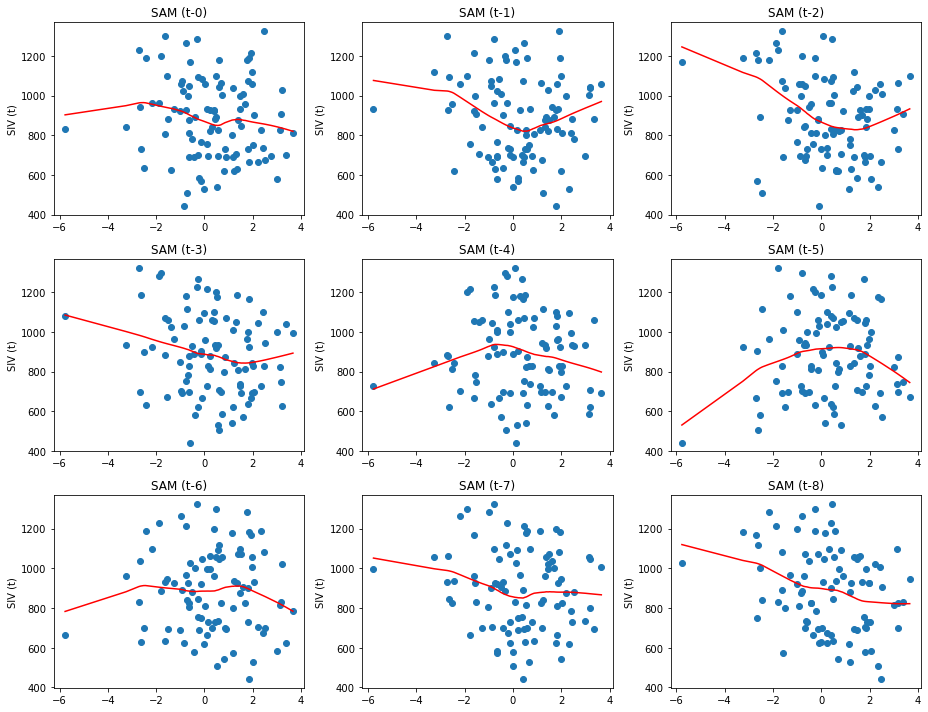

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import rpy2.robjects as robjects
import statsmodels.api as sm
from statsmodels.formula.api import ols

from astsadata import *


fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(13, 10))

lag = 0
for row in range(3):
    for col in range(3):
        lowess = sm.nonparametric.lowess(df_vol.iloc[:, 0], df_sam.iloc[:, 0].shift(lag))
        axes[row, col].scatter(df_sam.shift(lag), df_vol)
        axes[row, col].set_title(f"SAM (t-{lag})")
        axes[row, col].set_ylabel("SIV (t)")
        axes[row, col].plot(lowess[:, 0], lowess[:, 1], color="red")
        lag += 1

fig.tight_layout()
plt.savefig("/Users/fridaperez/Developer/repos/local_repo/pub_plots/Ross-Amud_ccf_SAM.png", dpi=300)

# SOI x SIV

In [12]:
#-----Read in SOI as dataframe
soi_df = pd.read_csv('/Users/fridaperez/Developer/repos/local_repo/AtmosIndex/SOI_index.csv')

In [13]:
# have to use pandas melt to go from wide to long data
soi_melt = pd.melt(soi_df, id_vars='Years')
soi_melt = soi_melt.rename(columns={"variable":"Month"})
soi_melt['Dates'] = pd.to_datetime(soi_melt[['Years', 'Month']].assign(DAY=1))

In [14]:
soi_melt = soi_melt.drop(["Years", "Month"], axis=1)
soi_melt['Dates'] = soi_melt['Dates'].astype('datetime64[ns]')

In [15]:
soi_melt

,value,Dates
0,1.0,1866-01-01
1,1.2,1867-01-01
2,-0.2,1868-01-01
3,1.5,1869-01-01
4,-2.3,1870-01-01
...,...,...
1879,-1.1,2018-12-01
1880,1.1,2019-12-01
1881,-0.8,2020-12-01
1882,-0.8,2021-12-01


In [16]:
# Get dates  for only May -October
soi_melt = soi_melt[(soi_melt.Dates.dt.month >= 5) & (soi_melt.Dates.dt.month <= 10)]
# Here we set the index so that we can filter using iloc
soi_melt = soi_melt.set_index('Dates')
soi_melt = soi_melt.loc['2002-05-01':'2018-10-01']
# ## Removing the first 5 rows/dates
soi_melt  = soi_melt.iloc[5:]

In [17]:
# # we now want the 'Dates' as a normal column and not an index
soi_melt = soi_melt.reset_index()
soi_melt.rename(columns = {'SOI':'value'}, inplace = True)

# # Combining the SOI and SIV Dates
df_new_soi = soi_melt.copy()
df_new_soi["Volume"] = vol_df["volume"]

In [18]:
df_new_soi.reset_index()

,index,Dates,value,Volume
0,0,2007-05-01,0.9,923.753208
1,1,2008-05-01,1.3,691.286389
2,2,2009-05-01,-0.3,767.113866
3,3,2010-05-01,-0.7,847.812585
4,4,2011-05-01,1.1,879.269180
...,...,...,...,...
92,92,2014-10-01,1.0,706.945553
93,93,2015-10-01,3.2,875.894342
94,94,2016-10-01,-0.2,1023.412510
95,95,2017-10-01,-1.2,1048.017796


In [19]:
df_new_soi.rename(columns = {'value':'SOI'}, inplace = True)

In [20]:
df_new_soi

,Dates,SOI,Volume
0,2007-05-01,0.9,923.753208
1,2008-05-01,1.3,691.286389
2,2009-05-01,-0.3,767.113866
3,2010-05-01,-0.7,847.812585
4,2011-05-01,1.1,879.269180
...,...,...,...
92,2014-10-01,1.0,706.945553
93,2015-10-01,3.2,875.894342
94,2016-10-01,-0.2,1023.412510
95,2017-10-01,-1.2,1048.017796


# Calculate cross correlation


In [21]:
import numpy as np
import statsmodels.api as sm
## SOI and SIV ##
sm.tsa.stattools.ccf(df_new_soi.SOI, df_new_soi.Volume, adjusted=False)

array([-0.03674006, -0.09770784, -0.15850187, -0.11920161,  0.07134488,
        0.01132524, -0.09546511, -0.13249136, -0.2094862 , -0.15841967,
       -0.01426967, -0.11113099, -0.16469911, -0.1723894 , -0.10712372,
       -0.05995116,  0.02376638, -0.03139039, -0.07272019, -0.09095431,
       -0.13074594,  0.02034205,  0.11503169,  0.04982409, -0.00023582,
        0.00252886, -0.10015424, -0.04878766,  0.01138947, -0.05295435,
       -0.09122524,  0.02160646,  0.00062662,  0.05319625,  0.14156854,
        0.05704171, -0.07041253, -0.0730473 , -0.03086237,  0.03512021,
        0.11743104,  0.10385706,  0.02527866, -0.07252941, -0.06836004,
       -0.00394899,  0.08213239,  0.08383642,  0.01804955, -0.00102676,
       -0.03210455,  0.05761237,  0.09504739,  0.07790789, -0.01355295,
       -0.0060039 , -0.01016813, -0.02890845,  0.07168427,  0.07413836,
       -0.05017359, -0.05799357, -0.03770342, -0.00252983,  0.10817251,
        0.14020673,  0.00766484, -0.0029286 , -0.01192239, -0.01

In [22]:
df_new_soi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Dates   97 non-null     datetime64[ns]
 1   SOI     97 non-null     float64       
 2   Volume  97 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 2.4 KB


In [23]:
# make a dataframe just for SOI
df_soi = df_new_soi[['Dates','SOI']]
df_soi['Dates'] = dates_df['Dates'].dt.to_period('M')
df_soi = df_soi.set_index(['Dates'])

/var/folders/f1/8zx2wbhx4vb8626x_99mwyx40000gn/T/ipykernel_10206/3428752084.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_soi['Dates'] = dates_df['Dates'].dt.to_period('M')


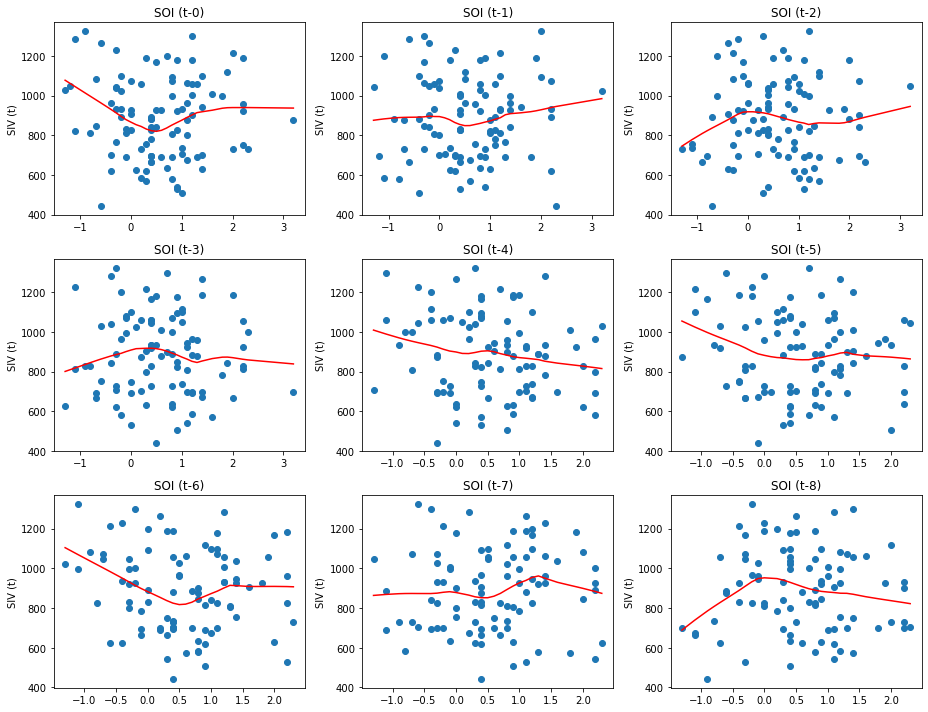

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import rpy2.robjects as robjects
import statsmodels.api as sm
from statsmodels.formula.api import ols

from astsadata import *


fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(13, 10))

lag = 0
for row in range(3):
    for col in range(3):
        lowess = sm.nonparametric.lowess(df_vol.iloc[:, 0], df_soi.iloc[:, 0].shift(lag))
        axes[row, col].scatter(df_soi.shift(lag), df_vol)
        axes[row, col].set_title(f"SOI (t-{lag})")
        axes[row, col].set_ylabel("SIV (t)")
        axes[row, col].plot(lowess[:, 0], lowess[:, 1], color="red")
        lag += 1

fig.tight_layout()
plt.savefig("/Users/fridaperez/Developer/repos/local_repo/pub_plots/Ross-Amud_ccf_SOI.png", dpi=300)

# ASL x SIV

In [25]:
#-----Read in ASL as dataframe
asl_df = pd.read_csv('/Users/fridaperez/Developer/repos/local_repo/AtmosIndex/ASL_index.csv')

In [26]:
asl_df

,Dates,Lon,Lat,ActCenPres,SectorPres,RelCenPres
0,2002-10-01,287.50,-65.75,986.911499,992.61320,-5.701721
1,2002-11-01,210.75,-71.50,988.258850,990.67206,-2.413208
2,2002-12-01,260.00,-67.00,976.395447,982.10020,-5.704773
3,2003-01-01,277.25,-63.00,986.213196,990.83466,-4.621460
4,2003-02-01,270.75,-66.50,976.448608,985.44165,-8.993042
...,...,...,...,...,...,...
227,2021-09-01,243.25,-70.50,962.242188,971.92790,-9.685730
228,2021-10-01,251.25,-69.50,959.429382,973.15680,-13.727417
229,2021-11-01,255.75,-70.00,966.653748,975.75385,-9.100098
230,2021-12-01,253.25,-71.25,968.441101,976.56810,-8.127014


In [27]:
asl_df = asl_df.drop(["Lon", "Lat","SectorPres", "RelCenPres"], axis=1)
asl_df['Dates'] = asl_df['Dates'].astype('datetime64[ns]')
print(asl_df)

         Dates  ActCenPres
0   2002-10-01  986.911499
1   2002-11-01  988.258850
2   2002-12-01  976.395447
3   2003-01-01  986.213196
4   2003-02-01  976.448608
..         ...         ...
227 2021-09-01  962.242188
228 2021-10-01  959.429382
229 2021-11-01  966.653748
230 2021-12-01  968.441101
231 2022-01-01  978.003418

[232 rows x 2 columns]


In [28]:
# Get dates  for only May -October
asl_df = asl_df[(asl_df.Dates.dt.month >= 5) & (asl_df.Dates.dt.month <= 10)]
# Here we set the index so that we can filter using iloc
asl_df = asl_df.set_index('Dates')
asl_df = asl_df.loc['2002-05-01':'2018-10-01']
# ## Removing the first 5 rows/dates
#asl_df  = asl_df.iloc[5:]
print(asl_df)

            ActCenPres
Dates                 
2002-10-01  986.911499
2003-05-01  967.435608
2003-06-01  985.111511
2003-07-01  969.911377
2003-08-01  972.973511
...                ...
2018-06-01  972.353699
2018-07-01  977.746094
2018-08-01  978.081421
2018-09-01  970.656189
2018-10-01  965.293152

[97 rows x 1 columns]


In [29]:
# # we now want the 'Dates' as a normal column and not an index
asl_df = asl_df.reset_index()
print(asl_df)

        Dates  ActCenPres
0  2002-10-01  986.911499
1  2003-05-01  967.435608
2  2003-06-01  985.111511
3  2003-07-01  969.911377
4  2003-08-01  972.973511
..        ...         ...
92 2018-06-01  972.353699
93 2018-07-01  977.746094
94 2018-08-01  978.081421
95 2018-09-01  970.656189
96 2018-10-01  965.293152

[97 rows x 2 columns]


In [30]:
# # Combining the ASL and SIV Dates
df_new_asl = asl_df.copy()
df_new_asl["Volume"] = vol_df["volume"]
print(df_new_asl)

        Dates  ActCenPres       Volume
0  2002-10-01  986.911499   923.753208
1  2003-05-01  967.435608   691.286389
2  2003-06-01  985.111511   767.113866
3  2003-07-01  969.911377   847.812585
4  2003-08-01  972.973511   879.269180
..        ...         ...          ...
92 2018-06-01  972.353699   706.945553
93 2018-07-01  977.746094   875.894342
94 2018-08-01  978.081421  1023.412510
95 2018-09-01  970.656189  1048.017796
96 2018-10-01  965.293152   697.573498

[97 rows x 3 columns]


## calculate cross correlation

In [31]:
import numpy as np
import statsmodels.api as sm
## ASL and SIV ##
sm.tsa.stattools.ccf(df_new_asl.ActCenPres, df_new_asl.Volume, adjusted=False)

array([ 0.177094  , -0.16396407, -0.17186453, -0.05340309,  0.16402608,
        0.23142741,  0.00076086, -0.23198065, -0.35736726, -0.15142924,
        0.10223413,  0.19601953,  0.11021462, -0.11184455, -0.21580183,
       -0.1098793 ,  0.12122501,  0.09728687, -0.03752931, -0.18618418,
       -0.18067762, -0.12878418,  0.12455653,  0.17355188, -0.00921826,
       -0.16062936, -0.17584124, -0.06723842,  0.1295132 ,  0.18483207,
        0.05323598, -0.05299014, -0.11621459, -0.02845831,  0.08562087,
        0.0957746 , -0.003115  , -0.14798605, -0.13582829,  0.0221848 ,
        0.13091192,  0.17283567,  0.08950366, -0.04323577, -0.04574193,
       -0.03354567,  0.09154555,  0.09268312,  0.01408419, -0.07305672,
       -0.09053216, -0.04065934,  0.07243345,  0.15342897,  0.04707202,
       -0.04037695, -0.06310123, -0.01450254,  0.0453329 ,  0.1046146 ,
        0.03577572, -0.05317935, -0.07338454, -0.04209672,  0.04932901,
        0.11682635,  0.04203313, -0.02716939, -0.06221374, -0.05

In [32]:
# make a dataframe just for ASL
df_asl = df_new_asl[['Dates','ActCenPres']]
df_asl['Dates'] = dates_df['Dates'].dt.to_period('M')
df_asl = df_asl.set_index(['Dates'])

/var/folders/f1/8zx2wbhx4vb8626x_99mwyx40000gn/T/ipykernel_10206/703316224.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_asl['Dates'] = dates_df['Dates'].dt.to_period('M')


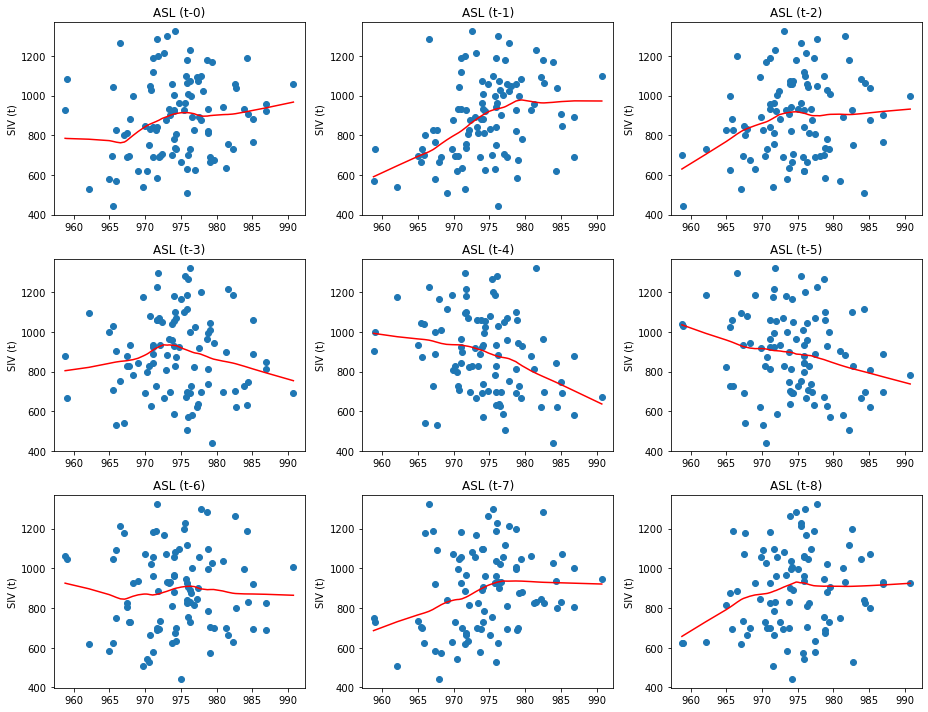

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import rpy2.robjects as robjects
import statsmodels.api as sm
from statsmodels.formula.api import ols

from astsadata import *


fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(13, 10))

lag = 0
for row in range(3):
    for col in range(3):
        lowess = sm.nonparametric.lowess(df_vol.iloc[:, 0], df_asl.iloc[:, 0].shift(lag))
        axes[row, col].scatter(df_asl.shift(lag), df_vol)
        axes[row, col].set_title(f"ASL (t-{lag})")
        axes[row, col].set_ylabel("SIV (t)")
        axes[row, col].plot(lowess[:, 0], lowess[:, 1], color="red")
        lag += 1

fig.tight_layout()
plt.savefig("/Users/fridaperez/Developer/repos/local_repo/pub_plots/Ross-Amud_ccf_ASL.png", dpi=300)